In [1]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from panns_inference import SoundEventDetection, labels
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from tqdm import tqdm
from scipy.spatial import ConvexHull

from sed import plot_sound_event_detection_result
from ambisonics.distance import SphericalAmbisonicsVisualizer

dataset_path = "/home/arthur/felles/Research/Users/Alexander/Still Standing"
metadata_path = "../metadata_processed.csv"
metadata = pd.read_csv(metadata_path)

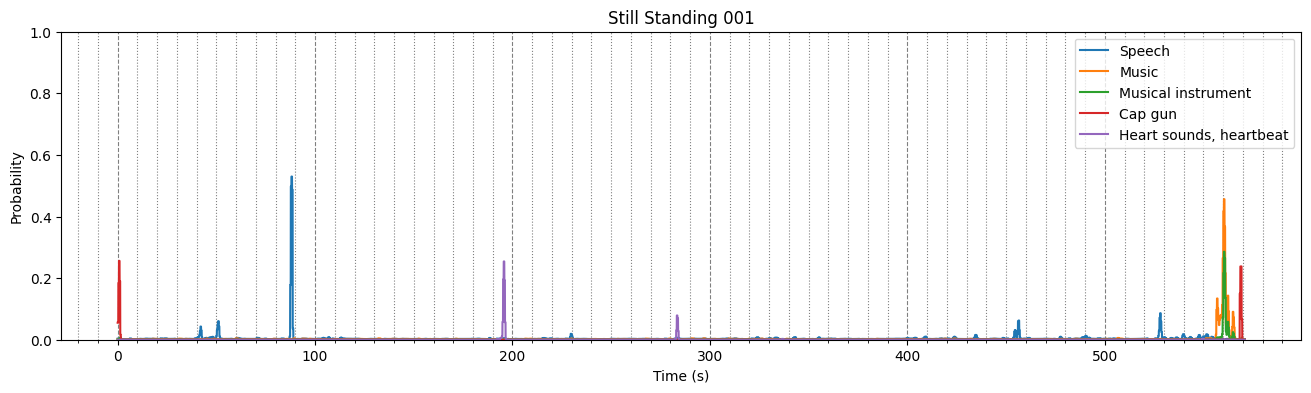

In [ ]:
no = 1 # stillstanding no.
sed_result = np.load(f"../sed_results/output/{no:03}.npy")
plot_sound_event_detection_result(no, sed_result, figsize=(16, 4))

In [303]:
wave_path = os.path.join(dataset_path, metadata.iloc[no - 1].audio_processed_path)
ambi, sr = librosa.load(wave_path, sr=None, mono=False, duration=None)
print(ambi.shape, sr)

(4, 27407875) 48000


In [ ]:
# compute energy of each DoA
viz = SphericalAmbisonicsVisualizer(
    data=ambi.T, rate=sr, angular_res=None, phi_res=2.0, nu_res=90
)

out_sum = []
for out in viz.loop_frames():
    out_sum.append(out)
out = np.zeros((len(out_sum), 180))
for i, o in enumerate(out_sum):
    out[i] = o[1, :]
out_sum = np.array(out_sum)
print(out_sum.shape)

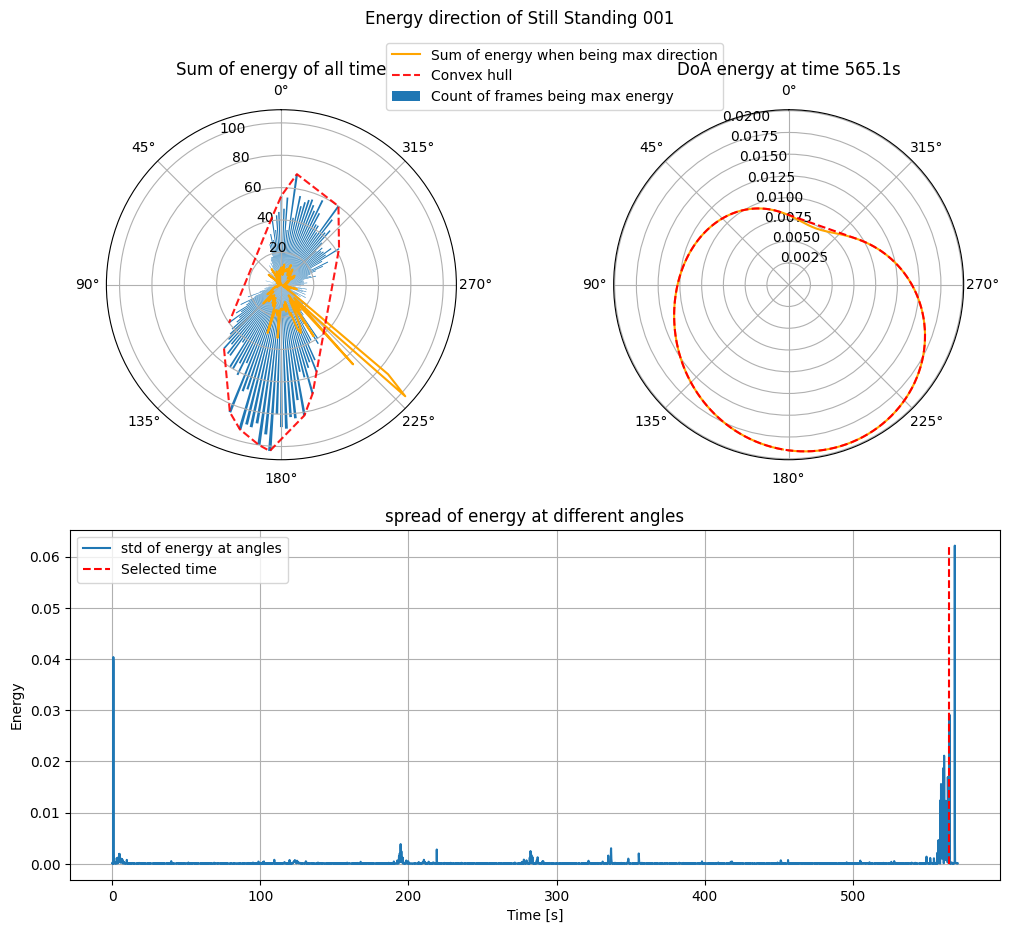

In [446]:
frame_idx = 5651
angles = viz.mesh()[1][1, :]

count_max = np.zeros_like(angles)
count_max_energy = np.zeros_like(angles)
argmaxes = out_sum[:, 1, :].argmax(axis=1)
for frame, direction_idx in enumerate(argmaxes):
    count_max[direction_idx] += 1
    count_max_energy[direction_idx] += out_sum[frame, 1, direction_idx]

hull_count = ConvexHull(np.vstack([count_max*np.cos(angles), count_max*np.sin(angles)]).T)
fig = plt.figure(figsize=(12, 10))
fig.suptitle(f"Energy direction of Still Standing {no:03}")
ax1 = plt.subplot(2, 2, 1, projection="polar")
ax1.set_theta_zero_location("N")
ax1.bar(angles, count_max, label="Count of frames being max energy", width=0.02)
ax1.plot(angles, count_max_energy/count_max_energy.max()*count_max.max(), label="Sum of energy when being max direction", color='orange')
ax1.plot(angles[hull_count.vertices], count_max[hull_count.vertices], color='red', label="Convex hull", alpha=0.9, linestyle='--')
ax1.set_title("Sum of energy of all time")

ax2 = plt.subplot(2, 2, 2, projection="polar")
values_time = out_sum[frame_idx, 1, :]
hull_time = ConvexHull(np.vstack([values_time*np.cos(angles), values_time*np.sin(angles)]).T)
ax2.set_theta_zero_location("N")
ax2.plot(angles, values_time, label="Energy", color='orange')
ax2.plot(angles[hull_time.vertices], values_time[hull_time.vertices], color='red', linestyle='--')
ax2.set_title(f"DoA energy at time {frame_idx/10:.1f}s")
# ax2.legend()
ax1.legend(loc=(0.8, 1))

ax3 = plt.subplot(2, 1, 2)
time = np.arange(len(out_sum)) / 10
# ax3.plot(time, out_sum[:, 1, :].mean(axis=1), label="Mean energy")
ax3.plot(time, out_sum[:, 1, :].std(axis=1), label="std of energy at angles")
ax3.set_title("spread of energy at different angles")
ax3.set_xlabel("Time [s]")
ax3.set_ylabel("Energy")
ax3.vlines(frame_idx/10, 0, out_sum[:, 1, :].std(axis=1).max(), color='red', linestyle='--', label="Selected time")
ax3.grid()
ax3.legend()


plt.show()

In [450]:
angles[hull_count.vertices]

array([ 2.40855437,  2.75762022,  2.86233997,  3.00196631,  3.07177948,
       -2.96705973, -2.86233997, -1.01229097, -0.62831853, -0.13962634,
        0.        ,  0.13962634,  2.19911486])

In [451]:
no = 5

wave_path = os.path.join(dataset_path, metadata.iloc[no - 1].audio_processed_path)
ambi, sr = librosa.load(wave_path, sr=None, mono=False, duration=None)
print(ambi.shape, sr)

(4, 27552118) 48000


In [452]:
# compute energy of each DoA
viz = SphericalAmbisonicsVisualizer(
    data=ambi.T, rate=sr, angular_res=None, phi_res=2.0, nu_res=90
)

out_sum = []
for out in viz.loop_frames():
    out_sum.append(out)
out = np.zeros((len(out_sum), 180))
for i, o in enumerate(out_sum):
    out[i] = o[1, :]
out_sum = np.array(out_sum)
print(out_sum.shape)

(5741, 3, 180)


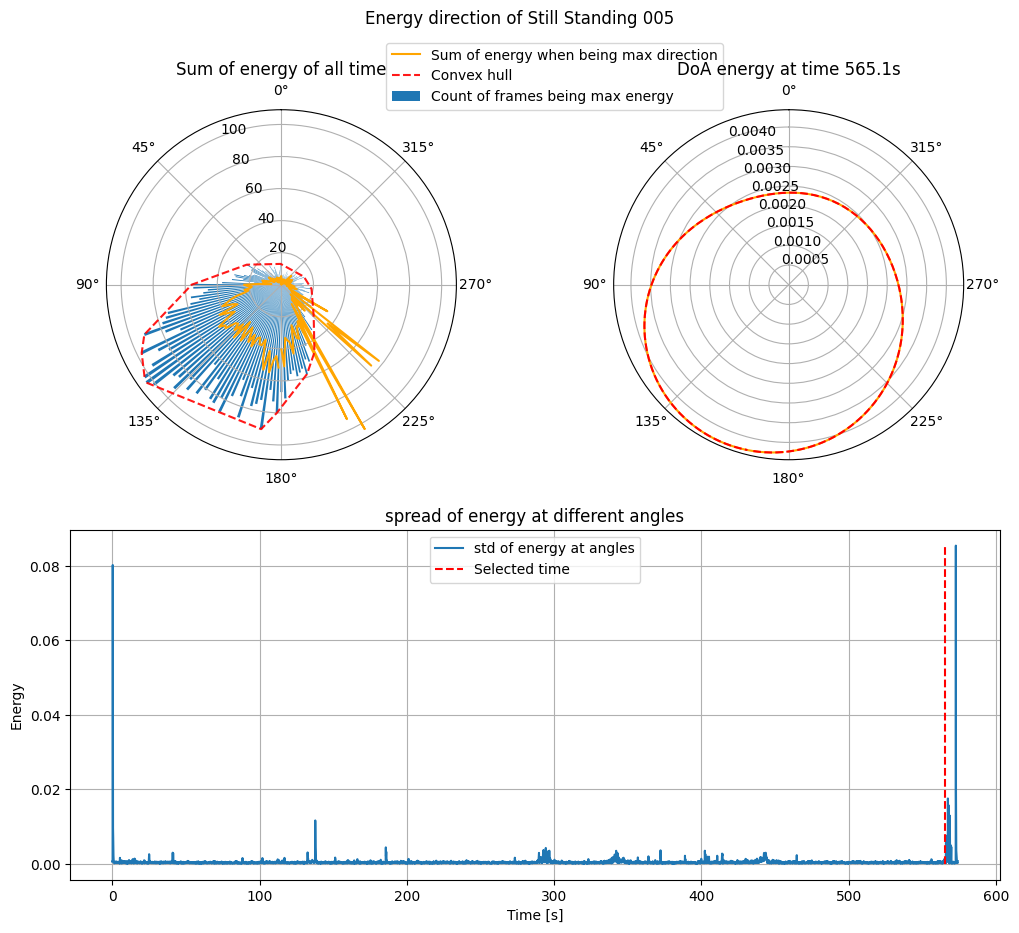

In [ ]:
frame_idx = 5651
angles = viz.mesh()[1][1, :]

count_max = np.zeros_like(angles)
count_max_energy = np.zeros_like(angles)
argmaxes = out_sum[:, 1, :].argmax(axis=1)
for frame, direction_idx in enumerate(argmaxes):
    count_max[direction_idx] += 1
    count_max_energy[direction_idx] += out_sum[frame, 1, direction_idx]

hull_count = ConvexHull(np.vstack([count_max*np.cos(angles), count_max*np.sin(angles)]).T)
fig = plt.figure(figsize=(12, 10))
fig.suptitle(f"Energy direction of Still Standing {no:03}")
ax1 = plt.subplot(2, 2, 1, projection="polar")
ax1.set_theta_zero_location("N")
ax1.bar(angles, count_max, label="Count of frames being max energy", width=0.02)
ax1.plot(angles, count_max_energy/count_max_energy.max()*count_max.max(), label="Sum of energy when being max direction", color='orange')
ax1.plot(angles[hull_count.vertices], count_max[hull_count.vertices], color='red', label="Convex hull", alpha=0.9, linestyle='--')
ax1.set_title("Sum of energy of all time")

ax2 = plt.subplot(2, 2, 2, projection="polar")
values_time = out_sum[frame_idx, 1, :]
hull_time = ConvexHull(np.vstack([values_time*np.cos(angles), values_time*np.sin(angles)]).T)
ax2.set_theta_zero_location("N")
ax2.plot(angles, values_time, label="Energy", color='orange')
ax2.plot(angles[hull_time.vertices], values_time[hull_time.vertices], color='red', linestyle='--')
ax2.set_title(f"DoA energy at time {frame_idx/10:.1f}s")
# ax2.legend()
ax1.legend(loc=(0.8, 1))

ax3 = plt.subplot(2, 1, 2)
time = np.arange(len(out_sum)) / 10
# ax3.plot(time, out_sum[:, 1, :].mean(axis=1), label="Mean energy")
ax3.plot(time, out_sum[:, 1, :].std(axis=1), label="std of energy at angles")
ax3.set_title("spread of energy at different angles")
ax3.set_xlabel("Time [s]")
ax3.set_ylabel("Energy")
ax3.vlines(frame_idx/10, 0, out_sum[:, 1, :].std(axis=1).max(), color='red', linestyle='--', label="Selected time")
ax3.grid()
ax3.legend()

plt.show()

(4, 27552118) 48000
(5741, 3, 180)


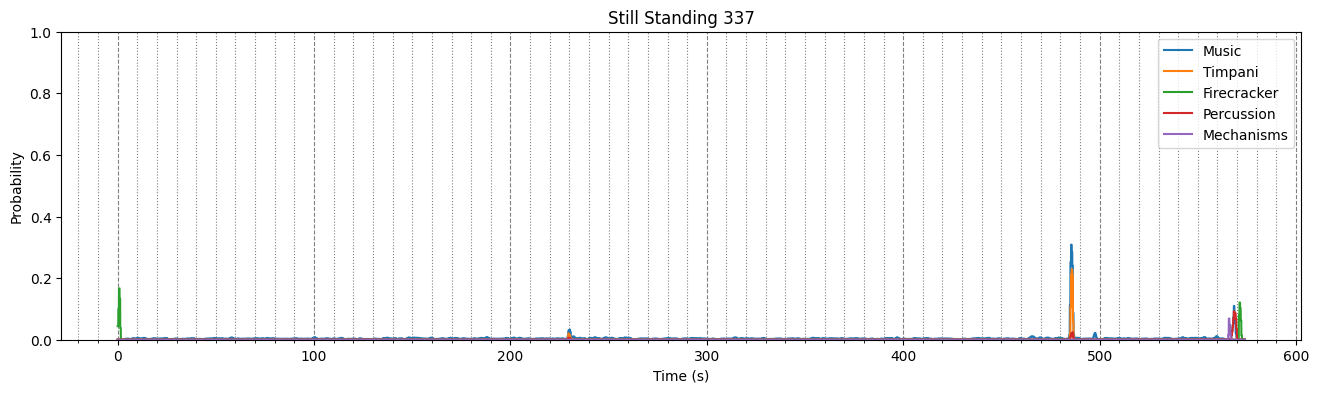

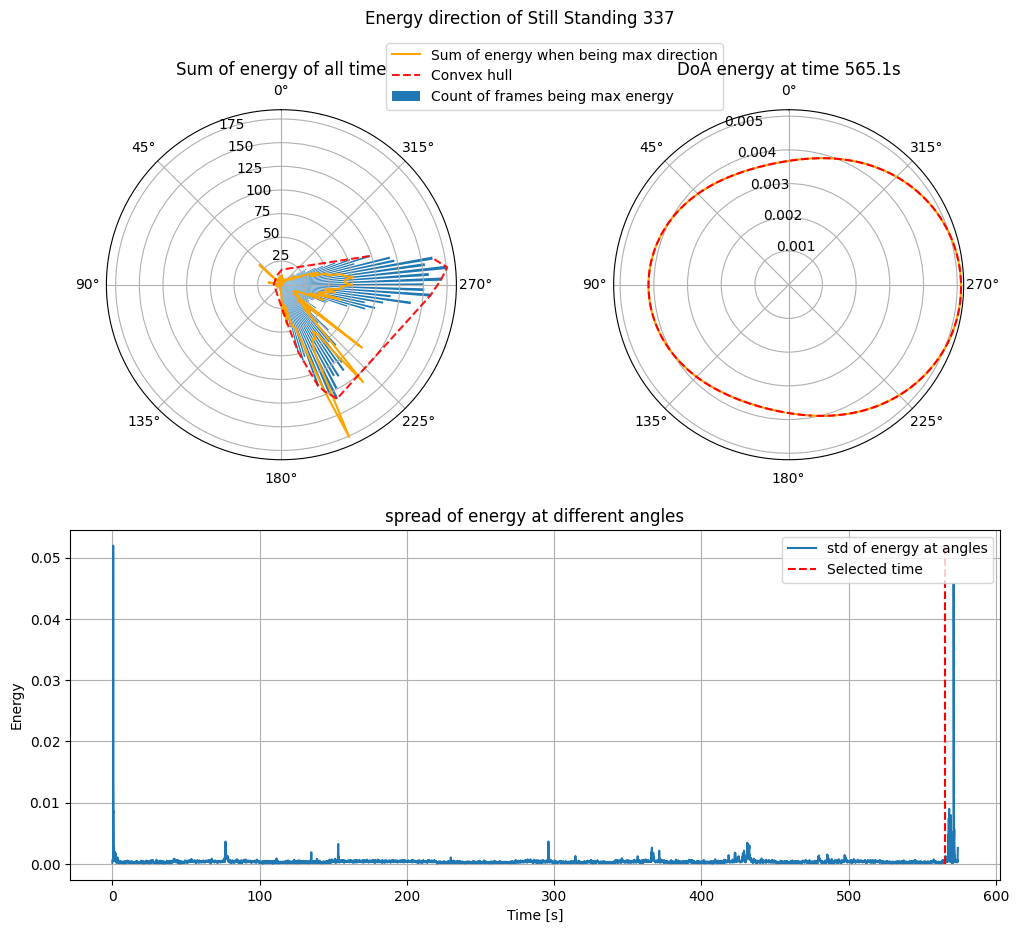

In [454]:
no = 337

sed_result = np.load(f"../sed_results/output/{no:03}.npy")
plot_sound_event_detection_result(no, sed_result, figsize=(16, 4))

wave_path = os.path.join(dataset_path, metadata.iloc[no - 1].audio_processed_path)
ambi, sr = librosa.load(wave_path, sr=None, mono=False, duration=None)
print(ambi.shape, sr)

# compute energy of each DoA
viz = SphericalAmbisonicsVisualizer(
    data=ambi.T, rate=sr, angular_res=None, phi_res=2.0, nu_res=90
)

out_sum = []
for out in viz.loop_frames():
    out_sum.append(out)
out = np.zeros((len(out_sum), 180))
for i, o in enumerate(out_sum):
    out[i] = o[1, :]
out_sum = np.array(out_sum)
print(out_sum.shape)

frame_idx = 5651
angles = viz.mesh()[1][1, :]

count_max = np.zeros_like(angles)
count_max_energy = np.zeros_like(angles)
argmaxes = out_sum[:, 1, :].argmax(axis=1)
for frame, direction_idx in enumerate(argmaxes):
    count_max[direction_idx] += 1
    count_max_energy[direction_idx] += out_sum[frame, 1, direction_idx]

hull_count = ConvexHull(np.vstack([count_max*np.cos(angles), count_max*np.sin(angles)]).T)
fig = plt.figure(figsize=(12, 10))
fig.suptitle(f"Energy direction of Still Standing {no:03}")
ax1 = plt.subplot(2, 2, 1, projection="polar")
ax1.set_theta_zero_location("N")
ax1.bar(angles, count_max, label="Count of frames being max energy", width=0.02)
ax1.plot(angles, count_max_energy/count_max_energy.max()*count_max.max(), label="Sum of energy when being max direction", color='orange')
ax1.plot(angles[hull_count.vertices], count_max[hull_count.vertices], color='red', label="Convex hull", alpha=0.9, linestyle='--')
ax1.set_title("Sum of energy of all time")

ax2 = plt.subplot(2, 2, 2, projection="polar")
values_time = out_sum[frame_idx, 1, :]
hull_time = ConvexHull(np.vstack([values_time*np.cos(angles), values_time*np.sin(angles)]).T)
ax2.set_theta_zero_location("N")
ax2.plot(angles, values_time, label="Energy", color='orange')
ax2.plot(angles[hull_time.vertices], values_time[hull_time.vertices], color='red', linestyle='--')
ax2.set_title(f"DoA energy at time {frame_idx/10:.1f}s")
# ax2.legend()
ax1.legend(loc=(0.8, 1))

ax3 = plt.subplot(2, 1, 2)
time = np.arange(len(out_sum)) / 10
# ax3.plot(time, out_sum[:, 1, :].mean(axis=1), label="Mean energy")
ax3.plot(time, out_sum[:, 1, :].std(axis=1), label="std of energy at angles")
ax3.set_title("spread of energy at different angles")
ax3.set_xlabel("Time [s]")
ax3.set_ylabel("Energy")
ax3.vlines(frame_idx/10, 0, out_sum[:, 1, :].std(axis=1).max(), color='red', linestyle='--', label="Selected time")
ax3.grid()
ax3.legend()

plt.show()

(4, 27119730) 48000
(5650, 3, 180)


IndexError: index 5651 is out of bounds for axis 0 with size 5650

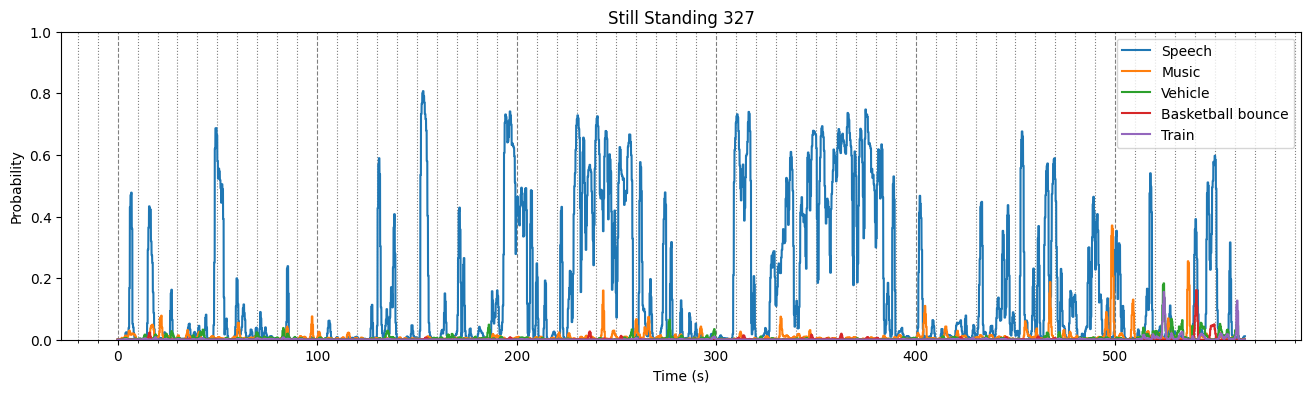

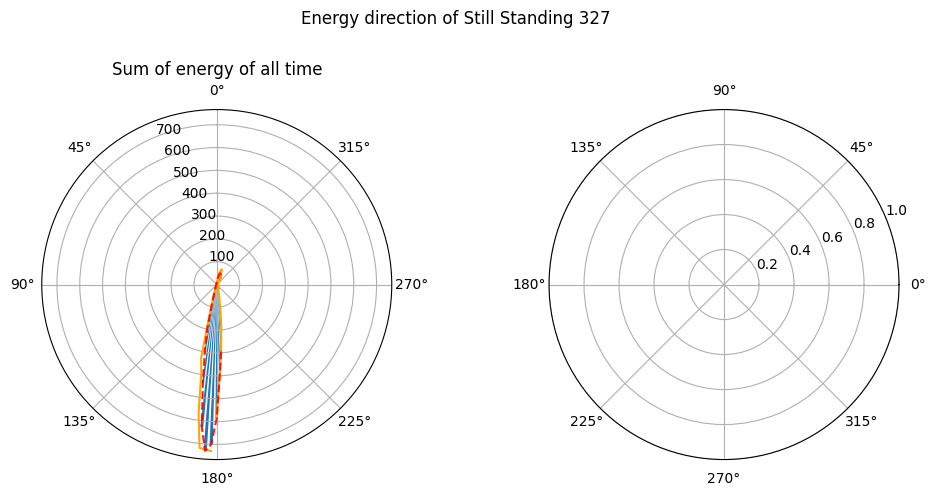

In [ ]:
no = 327

sed_result = np.load(f"../sed_results/output/{no:03}.npy")
plot_sound_event_detection_result(no, sed_result, figsize=(16, 4))

wave_path = os.path.join(dataset_path, metadata.iloc[no - 1].audio_processed_path)
ambi, sr = librosa.load(wave_path, sr=None, mono=False, duration=None)
print(ambi.shape, sr)

# compute energy of each DoA
viz = SphericalAmbisonicsVisualizer(
    data=ambi.T, rate=sr, angular_res=None, phi_res=2.0, nu_res=90
)

out_sum = []
for out in viz.loop_frames():
    out_sum.append(out)
out = np.zeros((len(out_sum), 180))
for i, o in enumerate(out_sum):
    out[i] = o[1, :]
out_sum = np.array(out_sum)
print(out_sum.shape)

frame_idx = 100
angles = viz.mesh()[1][1, :]

count_max = np.zeros_like(angles)
count_max_energy = np.zeros_like(angles)
argmaxes = out_sum[:, 1, :].argmax(axis=1)
for frame, direction_idx in enumerate(argmaxes):
    count_max[direction_idx] += 1
    count_max_energy[direction_idx] += out_sum[frame, 1, direction_idx]

hull_count = ConvexHull(np.vstack([count_max*np.cos(angles), count_max*np.sin(angles)]).T)
fig = plt.figure(figsize=(12, 10))
fig.suptitle(f"Energy direction of Still Standing {no:03}")
ax1 = plt.subplot(2, 2, 1, projection="polar")
ax1.set_theta_zero_location("N")
ax1.bar(angles, count_max, label="Count of frames being max energy", width=0.02)
ax1.plot(angles, count_max_energy/count_max_energy.max()*count_max.max(), label="Sum of energy when being max direction", color='orange')
ax1.plot(angles[hull_count.vertices], count_max[hull_count.vertices], color='red', label="Convex hull", alpha=0.9, linestyle='--')
ax1.set_title("Sum of energy of all time")

ax2 = plt.subplot(2, 2, 2, projection="polar")
values_time = out_sum[frame_idx, 1, :]
hull_time = ConvexHull(np.vstack([values_time*np.cos(angles), values_time*np.sin(angles)]).T)
ax2.set_theta_zero_location("N")
ax2.plot(angles, values_time, label="Energy", color='orange')
ax2.plot(angles[hull_time.vertices], values_time[hull_time.vertices], color='red', linestyle='--')
ax2.set_title(f"DoA energy at time {frame_idx/10:.1f}s")
# ax2.legend()
ax1.legend(loc=(0.8, 1))

ax3 = plt.subplot(2, 1, 2)
time = np.arange(len(out_sum)) / 10
# ax3.plot(time, out_sum[:, 1, :].mean(axis=1), label="Mean energy")
ax3.plot(time, out_sum[:, 1, :].std(axis=1), label="std of energy at angles")
ax3.set_title("spread of energy at different angles")
ax3.set_xlabel("Time [s]")
ax3.set_ylabel("Energy")
ax3.vlines(frame_idx/10, 0, out_sum[:, 1, :].std(axis=1).max(), color='red', linestyle='--', label="Selected time")
ax3.grid()
ax3.legend()

plt.show()

(4, 26880007) 48000
(5601, 3, 180)


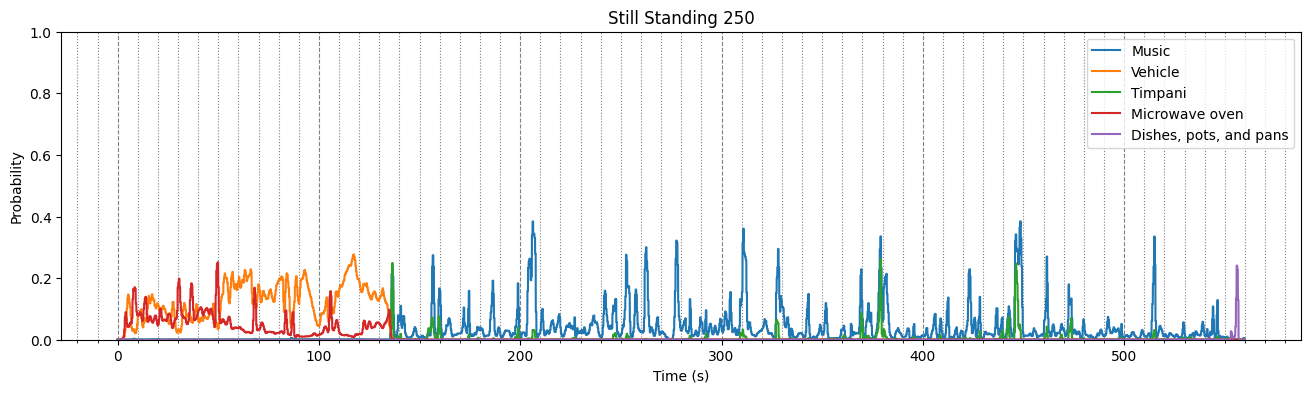

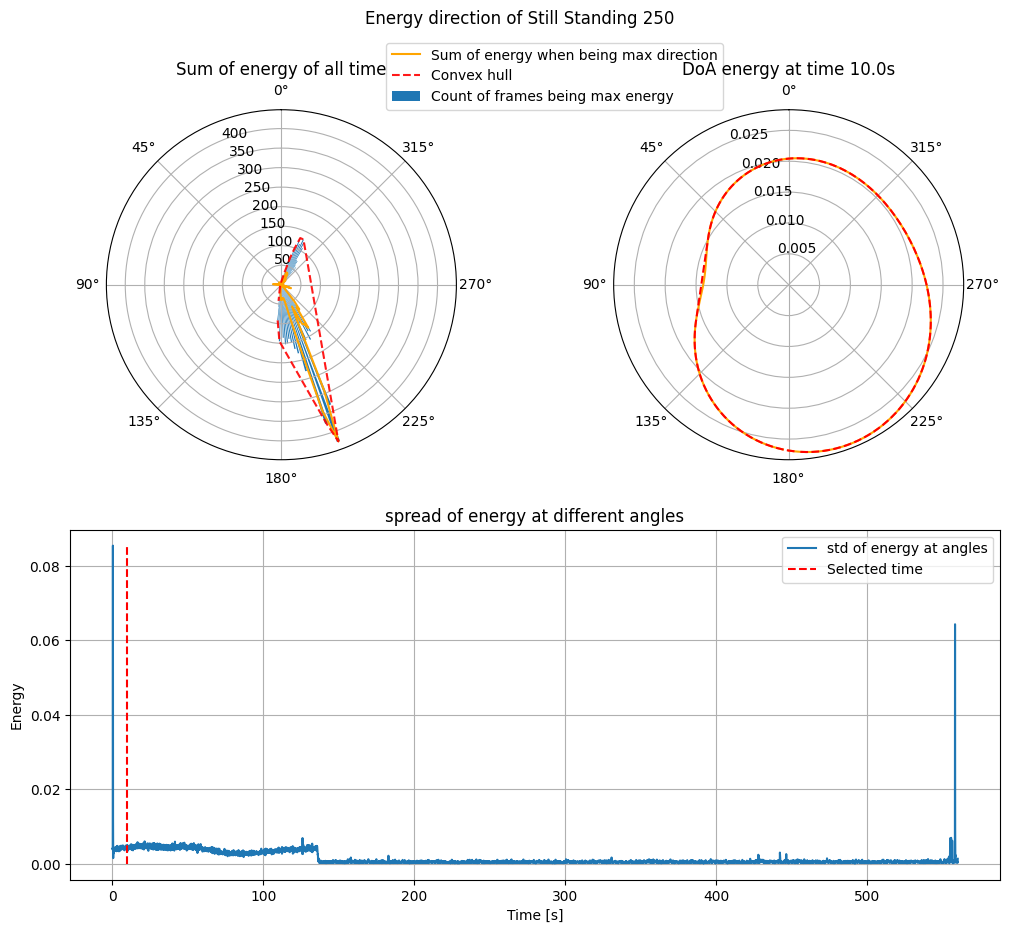

In [2]:
no = 250

sed_result = np.load(f"../sed_results/output/{no:03}.npy")
plot_sound_event_detection_result(no, sed_result, figsize=(16, 4))

wave_path = os.path.join(dataset_path, metadata.iloc[no - 1].audio_processed_path)
ambi, sr = librosa.load(wave_path, sr=None, mono=False, duration=None)
print(ambi.shape, sr)

# compute energy of each DoA
viz = SphericalAmbisonicsVisualizer(
    data=ambi.T, rate=sr, angular_res=None, phi_res=2.0, nu_res=90
)

out_sum = []
for out in viz.loop_frames():
    out_sum.append(out)
out = np.zeros((len(out_sum), 180))
for i, o in enumerate(out_sum):
    out[i] = o[1, :]
out_sum = np.array(out_sum)
print(out_sum.shape)

frame_idx = 100
angles = viz.mesh()[1][1, :]

count_max = np.zeros_like(angles)
count_max_energy = np.zeros_like(angles)
argmaxes = out_sum[:, 1, :].argmax(axis=1)
for frame, direction_idx in enumerate(argmaxes):
    count_max[direction_idx] += 1
    count_max_energy[direction_idx] += out_sum[frame, 1, direction_idx]

hull_count = ConvexHull(np.vstack([count_max*np.cos(angles), count_max*np.sin(angles)]).T)
fig = plt.figure(figsize=(12, 10))
fig.suptitle(f"Energy direction of Still Standing {no:03}")
ax1 = plt.subplot(2, 2, 1, projection="polar")
ax1.set_theta_zero_location("N")
ax1.bar(angles, count_max, label="Count of frames being max energy", width=0.02)
ax1.plot(angles, count_max_energy/count_max_energy.max()*count_max.max(), label="Sum of energy when being max direction", color='orange')
ax1.plot(angles[hull_count.vertices], count_max[hull_count.vertices], color='red', label="Convex hull", alpha=0.9, linestyle='--')
ax1.set_title("Sum of energy of all time")

ax2 = plt.subplot(2, 2, 2, projection="polar")
values_time = out_sum[frame_idx, 1, :]
hull_time = ConvexHull(np.vstack([values_time*np.cos(angles), values_time*np.sin(angles)]).T)
ax2.set_theta_zero_location("N")
ax2.plot(angles, values_time, label="Energy", color='orange')
ax2.plot(angles[hull_time.vertices], values_time[hull_time.vertices], color='red', linestyle='--')
ax2.set_title(f"DoA energy at time {frame_idx/10:.1f}s")
# ax2.legend()
ax1.legend(loc=(0.8, 1))

ax3 = plt.subplot(2, 1, 2)
time = np.arange(len(out_sum)) / 10
# ax3.plot(time, out_sum[:, 1, :].mean(axis=1), label="Mean energy")
ax3.plot(time, out_sum[:, 1, :].std(axis=1), label="std of energy at angles")
ax3.set_title("spread of energy at different angles")
ax3.set_xlabel("Time [s]")
ax3.set_ylabel("Energy")
ax3.vlines(frame_idx/10, 0, out_sum[:, 1, :].std(axis=1).max(), color='red', linestyle='--', label="Selected time")
ax3.grid()
ax3.legend()

plt.show()

In [ ]:
no = 219

sed_result = np.load(f"../sed_results/output/{no:03}.npy")
plot_sound_event_detection_result(no, sed_result, figsize=(16, 4))

wave_path = os.path.join(dataset_path, metadata.iloc[no - 1].audio_processed_path)
ambi, sr = librosa.load(wave_path, sr=None, mono=False, duration=None)
print(ambi.shape, sr)

# compute energy of each DoA
viz = SphericalAmbisonicsVisualizer(
    data=ambi.T, rate=sr, angular_res=None, phi_res=2.0, nu_res=90
)

out_sum = []
for out in viz.loop_frames():
    out_sum.append(out)
out = np.zeros((len(out_sum), 180))
for i, o in enumerate(out_sum):
    out[i] = o[1, :]
out_sum = np.array(out_sum)
print(out_sum.shape)

frame_idx = 100
angles = viz.mesh()[1][1, :]

count_max = np.zeros_like(angles)
count_max_energy = np.zeros_like(angles)
argmaxes = out_sum[:, 1, :].argmax(axis=1)
for frame, direction_idx in enumerate(argmaxes):
    count_max[direction_idx] += 1
    count_max_energy[direction_idx] += out_sum[frame, 1, direction_idx]

hull_count = ConvexHull(np.vstack([count_max*np.cos(angles), count_max*np.sin(angles)]).T)
fig = plt.figure(figsize=(12, 10))
fig.suptitle(f"Energy direction of Still Standing {no:03}")
ax1 = plt.subplot(2, 2, 1, projection="polar")
ax1.set_theta_zero_location("N")
ax1.bar(angles, count_max, label="Count of frames being max energy", width=0.02)
ax1.plot(angles, count_max_energy/count_max_energy.max()*count_max.max(), label="Sum of energy when being max direction", color='orange')
ax1.plot(angles[hull_count.vertices], count_max[hull_count.vertices], color='red', label="Convex hull", alpha=0.9, linestyle='--')
ax1.set_title("Sum of energy of all time")

ax2 = plt.subplot(2, 2, 2, projection="polar")
values_time = out_sum[frame_idx, 1, :]
hull_time = ConvexHull(np.vstack([values_time*np.cos(angles), values_time*np.sin(angles)]).T)
ax2.set_theta_zero_location("N")
ax2.plot(angles, values_time, label="Energy", color='orange')
ax2.plot(angles[hull_time.vertices], values_time[hull_time.vertices], color='red', linestyle='--')
ax2.set_title(f"DoA energy at time {frame_idx/10:.1f}s")
# ax2.legend()
ax1.legend(loc=(0.8, 1))

ax3 = plt.subplot(2, 1, 2)
time = np.arange(len(out_sum)) / 10
# ax3.plot(time, out_sum[:, 1, :].mean(axis=1), label="Mean energy")
ax3.plot(time, out_sum[:, 1, :].std(axis=1), label="std of energy at angles")
ax3.set_title("spread of energy at different angles")
ax3.set_xlabel("Time [s]")
ax3.set_ylabel("Energy")
ax3.vlines(frame_idx/10, 0, out_sum[:, 1, :].std(axis=1).max(), color='red', linestyle='--', label="Selected time")
ax3.grid()
ax3.legend()

plt.show()

(4, 26928088) 48000
